# Introduction

**Performing exploratory data analysis on the top 50 spotify tracks dataset**

# Loading the data

In [2]:
# Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Importing the spotify data
df = pd.read_csv('./spotifytoptracks.csv', sep = ',', index_col= 0)
df.head(50)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.3340,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.5400,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.6420,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.8940,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.6790,123.950,183290,Nu-disco
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.4970,89.977,181733,Hip-Hop/Rap
6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.5570,95.390,174000,Pop
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.3480,144.026,173333,Hip-Hop/Rap
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.2360,127.087,159382,R&B/Hip-Hop alternative
9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,0.405,0.501,1,-5.679,0.75100,0.0319,0.000000,0.1050,0.4460,109.891,182161,Alternative/Indie


# Data Cleaning

## Checking the data to see if there are any duplicates or missing values

In [4]:
df.isnull().any()

artist              False
album               False
track_name          False
track_id            False
energy              False
danceability        False
key                 False
loudness            False
acousticness        False
speechiness         False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
genre               False
dtype: bool

In [5]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

**Checking out the dataset with functions important for statistics**

In [6]:
df.describe()

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


## Finding the outliers

**Setting the default iqr values and calculating upper and lower bounds of the dataset**

In [7]:
iqr =  df.quantile(0.75) - df.quantile(0.25)
lower_bound = df.quantile(0.25) - (1.5 * iqr)
upper_bound = df.quantile(0.75) + (1.5 * iqr)
lower_bound

energy                   0.140375
danceability             0.489500
key                     -8.125000
loudness               -12.453000
acousticness            -0.316125
speechiness             -0.112437
instrumentalness        -0.000030
liveness                -0.172000
valence                 -0.004375
tempo                   50.417625
duration_ms         117017.750000
dtype: float64

In [14]:
iqr

energy                  0.235750
danceability            0.122000
key                     6.750000
loudness                3.267000
acousticness            0.245950
speechiness             0.107175
instrumentalness        0.000020
liveness                0.177300
valence                 0.292250
tempo                  32.759750
duration_ms         39218.500000
dtype: float64

In [8]:
upper_bound

energy                   1.083375
danceability             0.977500
key                     18.875000
loudness                 0.615000
acousticness             0.667675
speechiness              0.316263
instrumentalness         0.000051
liveness                 0.537200
valence                  1.164625
tempo                  181.456625
duration_ms         273891.750000
dtype: float64

**Comparing to see if there are any values in the dataset that are below the lower bound and higher than the upper bound to see if we can graph them**

In [9]:
(df < lower_bound) | (df > upper_bound)

<ipython-input-9-db2f6ffcc6e2>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df < lower_bound) | (df > upper_bound)
<ipython-input-9-db2f6ffcc6e2>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df < lower_bound) | (df > upper_bound)


,acousticness,album,artist,danceability,duration_ms,energy,genre,instrumentalness,key,liveness,loudness,speechiness,tempo,track_id,track_name,valence
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Since outliers were found we can visualize them in a boxplot**

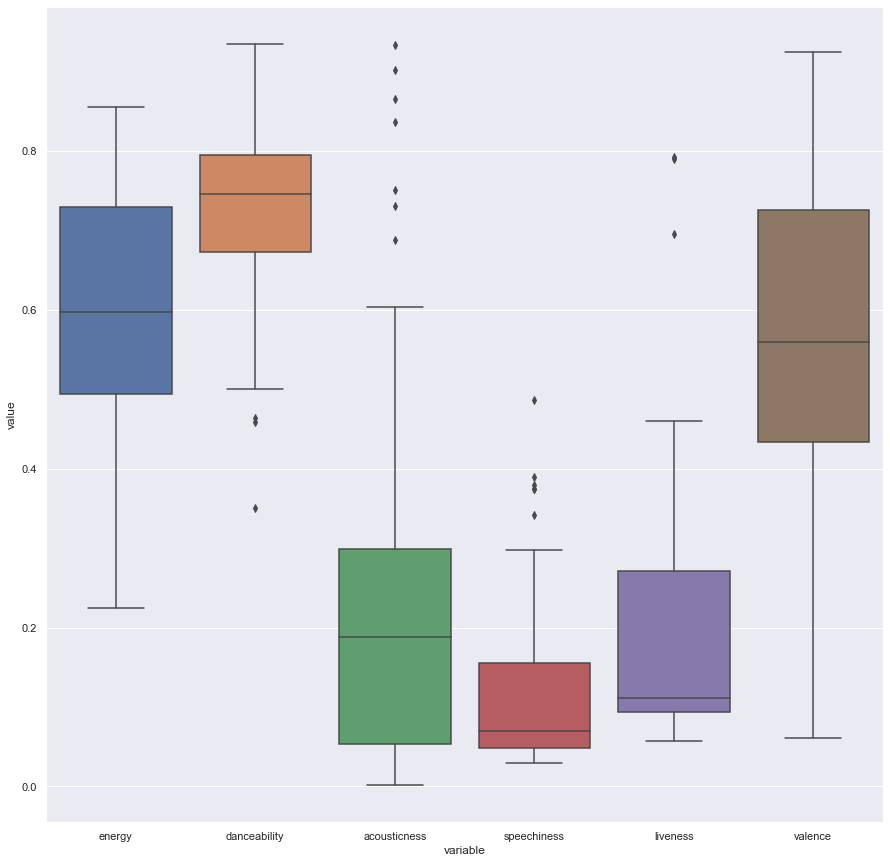

In [10]:
df_2 = pd.DataFrame(data = df, columns = ['energy', 'danceability', 'acousticness',
                                          'speechiness', 'liveness', 'valence'])
sb.set(rc={'figure.figsize':(15, 15)})
sb.boxplot(x='variable', y='value', data=pd.melt(df_2))
plt.show()

**As we can see not all of the datasets features were added to df_2 to be visualized later on since they would mess up the plot because they have huge values making the features listed above obsolete the other features will be visualized below**

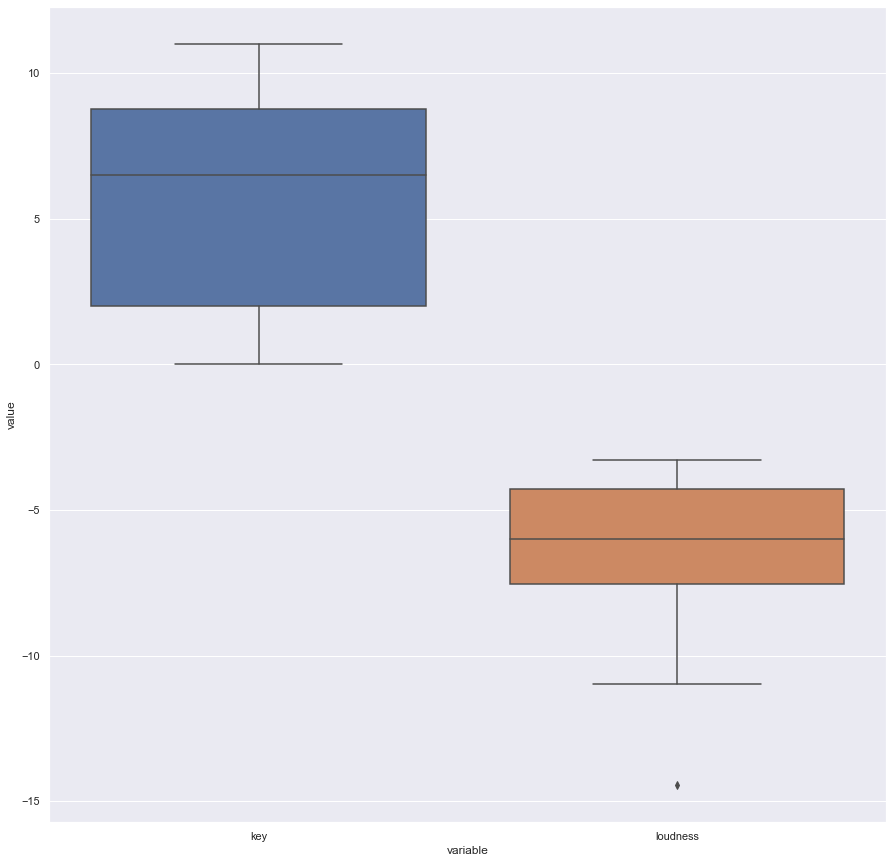

In [11]:
df_3 = pd.DataFrame(data = df, columns = ['key','loudness'])
sb.boxplot(x='variable', y='value', data=pd.melt(df_3))
plt.show()

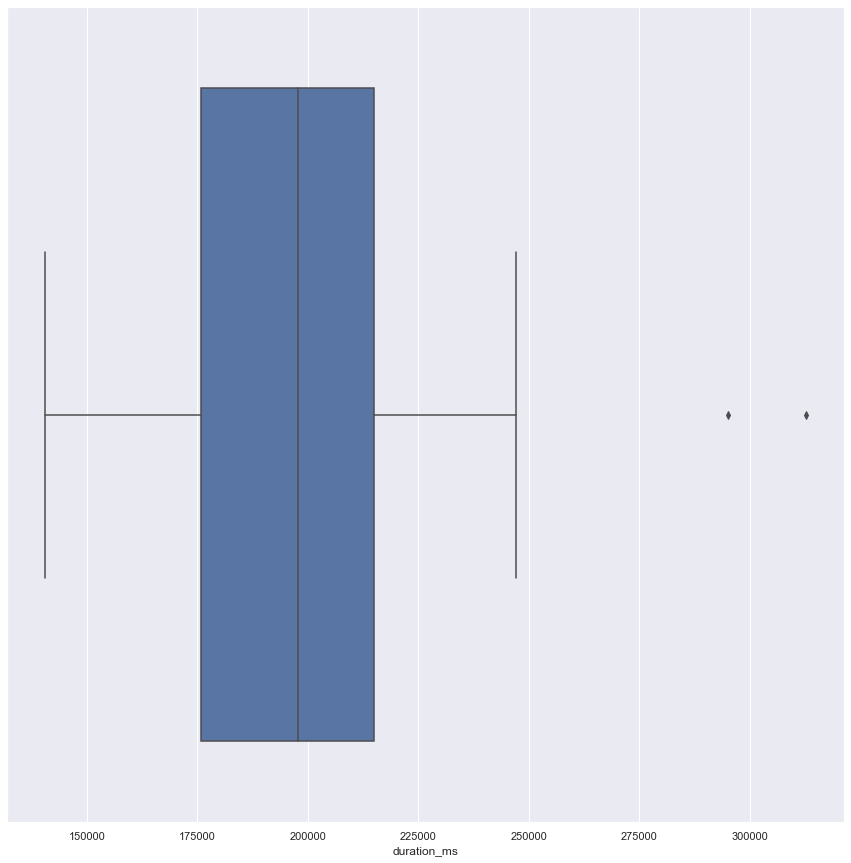

In [12]:
sb.boxplot(x=df['duration_ms'])
plt.show()

In [13]:
sns.boxplot(x=df['instrumentalness'])
plt.show()

NameError: name 'sns' is not defined

# Exploratory data analysis

## How many observations are in this dataset ?

In [ ]:
df.shape[0]

## How many features this dataset has?

In [ ]:
df.shape[1]

## Which of these features are numeric ?

In [ ]:
columns = df.columns
numeric = df._get_numeric_data().columns
numeric

**Numeric Features are** : 
* energy 
* danceability
* loudness
* acousticness
* speechiness
* instrumentalness
* liveness
* valence
* tempo
* duration_ms

**I have not mentioned key here since I think it should be a categorical feature** 

## Which of these features are categorical ?

In [ ]:
categorical = list(set(columns) - set(numeric))
categorical.append('key')
categorical

**Categorical Features are** : 
* artist 
* genre
* track_name
* album
* track_id
* key

**Sorting all of the artists by how many tracks they have in the top 50**

In [15]:
track_count = df.groupby('artist')['track_name'].count().sort_values()
track_count

artist
24kGoldn           1
Lady Gaga          1
Lil Mosey          1
Maluma             1
Maroon 5           1
Powfu              1
Regard             1
Roddy Ricch        1
SAINt JHN          1
Shawn Mendes       1
Surf Mesa          1
Surfaces           1
THE SCOTTS         1
The Weeknd         1
Tones And I        1
Topic              1
KAROL G            1
Juice WRLD         1
Trevor Daniel      1
DaBaby             1
JP Saxe            1
Ariana Grande      1
Arizona Zervas     1
Future             1
Eminem             1
BENEE              1
BTS                1
Drake              1
Doja Cat           1
Jawsh 685          1
Cardi B            1
Black Eyed Peas    1
Bad Bunny          1
Justin Bieber      2
Post Malone        2
Lewis Capaldi      2
Harry Styles       2
Dua Lipa           3
Billie Eilish      3
Travis Scott       3
Name: track_name, dtype: int64

## Are there any artists that have more than 1 popular track?

In [ ]:
(track_count > 1).any()

## How many artists are there with more than 1 track ?

In [16]:
popular_artists = track_count[(track_count > 1)]
popular_artists.count()

7

## Which artists where the most popular ?

In [ ]:
most_popular = popular_artists[(popular_artists == popular_artists.max())]
most_popular

**Most popular artists were all with 3 songs in the top 50**
* Dua Lipa
* Billie Eilish
* Travis Scott

## How many artists in total have their songs in the top 50?

In [ ]:
track_count.count()

## Are there any albums that have more than 1 popular track?

In [ ]:
counted_albums = df.groupby('album')['track_name'].count().sort_values()
(counted_albums > 1).any()

## How many of these albums have more than one track ?

In [ ]:
albums_with_more_than_one = counted_albums[(counted_albums > 1)]
albums_with_more_than_one.count()

## How many albums in total have their songs in the top 50?

In [ ]:
counted_albums.count()

## Which tracks have their danceability score above 0.7 ?

In [ ]:
danceability_sorted = df.sort_values('danceability')
danceability_above = danceability_sorted[(danceability_sorted['danceability'] > 0.7)]
danceability_above[['track_name', 'danceability']]

## Which tracks have their danceability score below 0.4?

In [ ]:
danceability_below = danceability_sorted[(danceability_sorted['danceability'] < 0.4)]
danceability_below[['track_name', 'danceability']]

## Which tracks have their loudness above -5?

In [ ]:
loudness_sorted = df.sort_values('loudness')
loudness_above = loudness_sorted[(loudness_sorted['loudness'] > -5)]
loudness_above[['track_name', 'loudness']]

## Which tracks have their loudness below -8?

In [ ]:
loudness_below = loudness_sorted[(loudness_sorted['loudness'] < -8)]
loudness_below[['track_name', 'loudness']]

**Writing function to convert from milliseconds**

In [ ]:
def convert_from_ms(milliseconds):
    seconds, milliseconds = divmod(milliseconds,1000)
    minutes, seconds = divmod(seconds, 60)
    seconds = seconds + milliseconds/1000
    return (f"{minutes} minutes : {round(seconds)} seconds")

## Which track is the longest ?

In [ ]:
longest_track = df['duration_ms'].max()
convert_from_ms(longest_track)

## Which track is the shortest ?

In [ ]:
shortest_track = df['duration_ms'].min()
convert_from_ms(shortest_track)

## Which genres have just one song in the top 50 ? 

In [ ]:
genre_popularity = df.groupby('genre')['track_name'].count().sort_values()
genre_popularity[genre_popularity == 1].count()

## Which genre is the most popular ? 

In [ ]:
most_popular_genre = genre_popularity.idxmax()
most_popular_genre

## How many genres are there in the top 50 ?

In [ ]:
genre_popularity.count()

**Creating a copy of main dataset to look for correlations**

In [ ]:
df_copy = df.copy()
df_copy.pop('key') # we don't want to check correlations for the key part
df_copy

In [ ]:
df_correlation = df_copy.corr()
df_correlation

## Which features are strongly positively correlated?

In [ ]:
positive_cor = df_correlation[df_correlation >= 0.7]
positive_cor

## Which features are strongly negatively correlated?

In [ ]:
negative_cor = df_correlation[df_correlation <= -0.6]
negative_cor

## Heatmap of the features where green implies a strong correlation and red a very small one

In [ ]:
correlation = sb.heatmap(df_copy.corr(), cmap="brg", annot=True, vmin=-1, vmax=1)

## Which features are not correlated ?

**The features shown here have very small to none correlations in a bigger dataset I think they would shrink even more**

In [ ]:
not_cor = df_correlation[(df_correlation > -0.05) & (df_correlation < 0.05)]
not_cor

## How the danceability score compares between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [ ]:
genres_to_compare = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']
for genre in genres_to_compare:
    print(danceability_sorted.groupby('genre').get_group(genre)[['danceability', 'genre']])

## How the loudness score compares between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [ ]:
for genre in genres_to_compare:
    print(loudness_sorted.groupby('genre').get_group(genre)[['loudness', 'genre']])

## How the acousticness score compares between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [ ]:
acousticness_sorted = df.sort_values('acousticness')
for genre in genres_to_compare:
    print(acousticness_sorted.groupby('genre').get_group(genre)[['acousticness', 'genre']])